# **T200 Thruster Polyfit**

The T200 is a more powerful version of the T100 Thruster. Great for powering larger ROVs, AUVs, and surface vessels.
[Check here for more info.](https://www.bluerobotics.com/store/thrusters/t200-thruster/)


## Goal
Define an equation to relate thrust (kgf) with pwm, util for simulation and mathematical models. \\
Example (fifth order linear fitting): \\
$x = pwm$ \\
$kgf_{16V} = $$- 3.04338931856672 \cdot 10^{-13} x^{5} + 2.27813523978448 \cdot 10^{-9} x^{4} - 6.73710647138884 \cdot 10^{-6} x^{3} + 0.00983670053385902 x^{2} - 7.08023833982539 x + 2003.55692021905$


## TODO
- Voltage decaiment compensation
- Nonlinear fuzzy fitting


---
This work is based on the data contained [here](http://docs.bluerobotics.com/thrusters/t200/#performance-charts).



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen


# Download last data available of T200
url = 'https://gist.githubusercontent.com/patrickelectric/afaf043af8b1e796980f4beae8f0543d/raw/9a2cce5d376eb784c66f883f05f8aeaa68f655f9/t200.csv'
response = urlopen(url)
csv = pd.read_csv(response)

# Print the table
csv

,thrust 16V,rpm 16V,power 16V,current 16V,voltage 16V,pwm 16V,thrust (kgf) 16V,efficiency (g/w) 16V,thrust 12V,rpm 12V,power 12V,current 12V,voltage 12V,pwm 12V,thrust (kgf) 12V,efficiency (g/w) 12V
0,-9.00,3200,344.48,21.53,14.98,1100,-4.082336,11.850720,-6.62,2960,182.20,15.40,11.83,1100,-3.002785,16.480708
1,-8.90,2767,341.92,21.37,15.25,1110,-4.082336,11.939448,-6.58,2870,181.03,15.19,11.92,1110,-2.984641,16.486999
2,-8.70,3245,328.96,20.56,15.33,1120,-4.086872,12.423614,-6.34,2837,169.05,14.25,11.86,1120,-2.875779,17.011411
3,-8.44,3269,305.12,19.07,15.35,1130,-3.828324,12.546946,-6.09,2784,160.31,13.48,11.89,1130,-2.762381,17.231494
4,-8.23,3269,289.12,18.07,15.35,1140,-3.733070,12.911835,-5.80,2750,146.97,12.38,11.87,1140,-2.630839,17.900516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,9.65,3317,267.84,16.74,15.33,1860,4.377172,16.342486,6.58,2802,145.51,12.18,11.94,1860,2.984641,20.511589
77,10.07,2539,283.52,17.72,15.33,1870,4.567681,16.110612,6.95,2874,156.08,13.06,11.95,1870,3.152471,20.197788
78,10.59,2343,301.60,18.85,15.32,1880,4.803549,15.926886,7.36,2915,166.98,13.96,11.96,1880,3.338444,19.993076
79,10.80,2315,324.32,20.27,15.31,1890,4.898803,15.104845,7.66,2956,176.44,14.79,11.93,1890,3.474522,19.692370


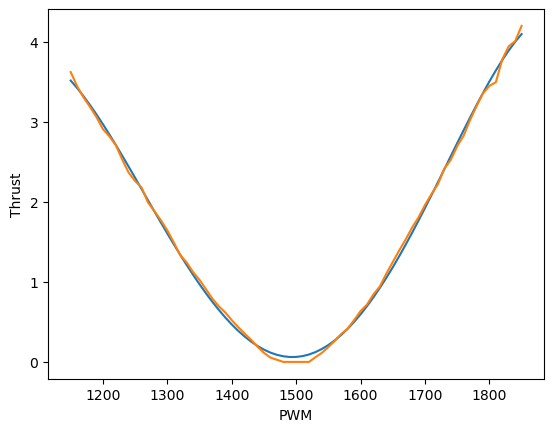

In [3]:
# Fit data
import numpy as np


# Do a linear fifth order fitting
pwm = csv['pwm 16V'].tolist()
pwm = pwm[5:-5]
thrust = csv['thrust (kgf) 16V'].tolist()
thrust = thrust[5:-5]
for i in range(len(pwm)):
  if(pwm[i] < 1500):
    thrust[i] = - thrust[i]

coefs = np.polyfit(pwm, thrust, 5)

# Plot the result
ffit = np.polyval(coefs, pwm)
plt.plot(pwm, ffit)
plt.plot(pwm, thrust)
plt.ylabel('Thrust');
plt.xlabel('PWM');

In [4]:
for label in ['thrust (kgf) 16V', 'pwm 16V']:
  csv[label] = (csv[label]-csv[label].mean())/csv[label].std()

RMS is 0.13665507623666218


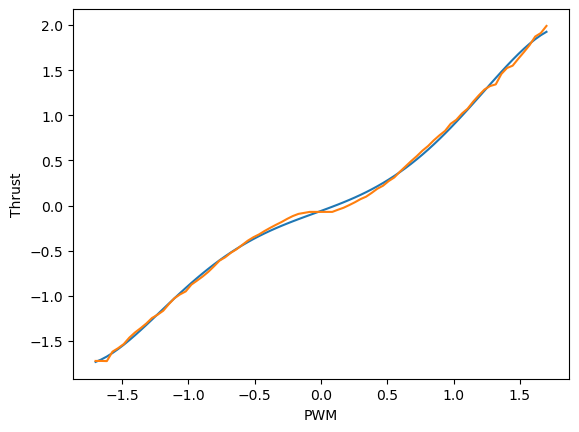

In [5]:
# Fit data
import numpy as np


# Do a linear fifth order fitting
pwm = csv['pwm 16V'].tolist()
thrust = csv['thrust (kgf) 16V'].tolist()

# for i in range(len(pwm)):
#   if(pwm[i] < 0):
#     thrust[i] = -thrust[i]

coefs = np.polyfit(pwm, thrust, 5)

# Plot the result
ffit = np.polyval(coefs, pwm)
plt.plot(pwm, ffit)
plt.plot(pwm, thrust)
plt.ylabel('Thrust');
plt.xlabel('PWM');

# Calcule RMS
RMS = np.sqrt(((ffit - csv['pwm 16V'].tolist()) ** 2).mean())
# Less than 1 is good !
print("RMS is {0}".format(RMS))

In [6]:
# Get Latex equation
import sympy as sp
from sympy.abc import x
sp.init_printing()
print(sp.Poly(np.poly1d(coefs).coef,x).as_expr())
sp.Poly(np.poly1d(coefs).coef,x).as_expr()

-0.0886937043074986*x**5 - 0.00545877001704709*x**4 + 0.442695591285139*x**3 + 0.0695613072837443*x**2 + 0.536616675414586*x - 0.059119802181461


### Inverse mapping

RMS is 0.07138965164415938


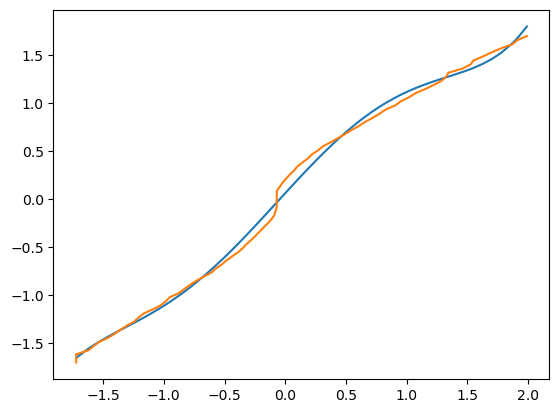

In [7]:
# Fit data
import numpy as np


# Do a linear fifth order fitting
coefs = np.polyfit(csv['thrust (kgf) 16V'].tolist(), csv['pwm 16V'].tolist(), 5)

# Plot the result
ffit = np.polyval(coefs, csv['thrust (kgf) 16V'].tolist())
plt.plot(csv['thrust (kgf) 16V'].tolist(), ffit)
plt.plot(csv['thrust (kgf) 16V'].tolist(), csv['pwm 16V'].tolist())

# Calcule RMS
RMS = np.sqrt(((ffit - csv['pwm 16V'].tolist()) ** 2).mean())
# Less than 1 is good !
print("RMS is {0}".format(RMS))

In [8]:
# Get Latex equation
import sympy as sp
from sympy.abc import x
sp.init_printing()
print(sp.Poly(np.poly1d(coefs).coef,x).as_expr())
sp.Poly(np.poly1d(coefs).coef,x).as_expr()

0.054608309216589*x**5 + 0.0043623874523217*x**4 - 0.320974346473973*x**3 - 0.0639160871326408*x**2 + 1.38048196118199*x + 0.0635708584715591
